In [1]:
%matplotlib inline
from common.Pmf import Pmf
import common.util as util
from common.util import make_mixture
from c5.Die import Die
from c5.c5_util import sample_sum, sample_max, pmf_max

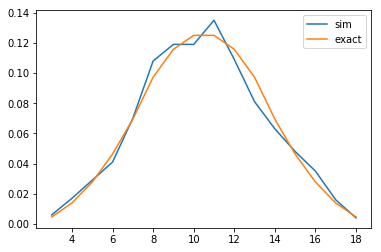

In [2]:
d6 = Die(6)
dice = [d6] * 3
pmf_sum_sim = sample_sum(dice, 1000, 'sim')

pmf_sum_exact = d6 + d6 + d6
pmf_sum_exact.name = 'exact'

pmf_sum_sim.plot_with([pmf_sum_exact])

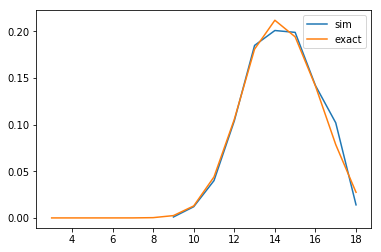

In [3]:
rolls = [pmf_sum_exact] * 6
pmf_max_sim = sample_max(rolls, 1000, 'sim')

pmf_max_exact = pmf_sum_exact.copy(name='exact')
for i in range(5):
    pmf_max_exact = pmf_max(pmf_max_exact, pmf_sum_exact)

pmf_max_sim.plot_with([pmf_max_exact])

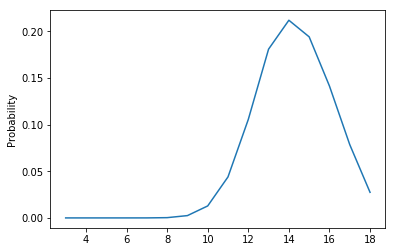

In [4]:
cdf_sum_exact = pmf_sum_exact.make_cdf()
cdf_best_attr = cdf_sum_exact.max(6)
pmf_best_attr = cdf_best_attr.make_pmf()
pmf_best_attr.plot()

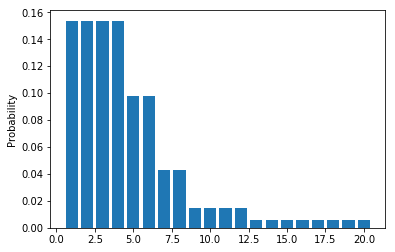

In [5]:
pmf_dice = Pmf()

pmf_dice.set(Die(4), 2)
pmf_dice.set(Die(6), 3)
pmf_dice.set(Die(8), 2)
pmf_dice.set(Die(12), 1)
pmf_dice.set(Die(20), 1)
pmf_dice.normalize()

mix = make_mixture(pmf_dice)
mix.plot_bar()